# Simple Linear Regression

---

The goal of simple linear regression is to compute a linear fit between a dependent variable $y$ and an independent variable $x$

## Covered in this notebook
* Introduction to linear regression with an educational dataset
* Very simple summary of the mathematical aspects
* Scikitlearn and "by hand" implementation

<a id='definition'></a>

## What is linear regression

The linear fit can be expressed in the form $h(x) = ax + b$ (a straight line)

To find this line, a gradient descent is performed to minimise the error of the line given by $ax + b$ and the 
$m$ dataset examples $x$

The error or cost is computed using the mean square error:

$$\frac1{2m} \sum_{i=1}^m(h(x_i) - y_i)^2$$

The gradient descent is performed by a repetition of small updates in the direction given by the derivative of the cost function

* with a and b represented by a vector $\theta$ => $h(x) = \theta_1x + \theta_0$

* $\alpha$ is the value of the little step to take

$$\theta_j = \theta_j \alpha \frac1m \sum_{i=1}^m(h(x_i) - y_i) x_{ji}$$ (simultaneously update $\theta_j$ for all $j$ => $h(x)$ is computed before updating all $\theta_j$)

These formulas were taken from the [Coursera Machine learning course](https://www.coursera.org/learn/machine-learning)

## Dataset

The dataset comes from the [Coursera Machine learning course](https://www.coursera.org/learn/machine-learning) too,
it contains the possible profits for a food truck in 10,000s according to the nearby population in 10,000s

This is an educational dataset, meaning that we already know that one can successfully perform a linear regression on it and focus only in the implementation

## The libraries

* [seaborn](https://seaborn.pydata.org/) for data visualisation
* numpy for linear algebra computing
* scikitlearn

In [17]:
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn import linear_model

## Import the dataset 

In [18]:
# This is a very basic example with data already good to go for linear regression
# so no need to use any library to process the data (pandas will be used in more advanced examples)
data = np.genfromtxt('datasets/CourseraSimpleLinearRegression.txt', delimiter=',')

## The seaborn version

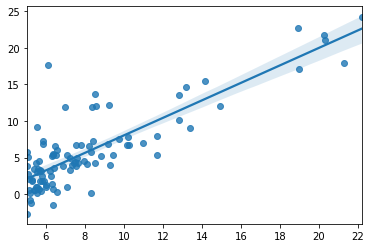

In [19]:
sns.regplot(x=data[:,0], y=data[:,1]);

## The scikit Learn version


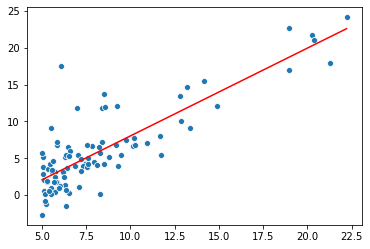

In [20]:
# transform the features shape to be (m, 1) instead of (m,)
x = data[:, 0].reshape(-1, 1)

regr = linear_model.LinearRegression()
regr.fit(x, data[:, 1])
predicts = regr.predict(x)

sns.scatterplot(data[:, 0], data[:, 1])
sns.lineplot(data[:, 0], predicts, color='r');

## Let's compute it by hand


### Setting up the data

In [21]:
m = data.shape[0]    # number of of training examples
thetas = np.zeros(2) # our unknown parameters in the line thetas[1]x + thetas[0]

# add a bias column for vectorized implementation
bias = np.ones(m, dtype=float)
X = np.vstack([bias, data[:, 0]]).transpose()

y = data[:, 1]      # the actual results

### Using gradient descent and computing the mean square error (cost)

In [22]:
# Hyperparameters for the gradient descent
alpha = 0.01 # learning step, how big to step in the direction of the derivative of the cost
n = 3000     # number of iterations

costs = np.zeros(n) # storing costs at each step for later display
for i in range(n):
    # Simultaneously update thetas according to the derivative of the
    # mean square error (cost or error function)
    # (1,2) = (1,2) - [ ((m,2) * (2,1) - (m,1)) => (1,m) * (m,2) => (1,2) ]
    thetas = thetas - alpha * ((X.dot(thetas) - y).dot(X)) / m
    # storing the cost at each step
    costs[i] = 0.5 * (np.square(X.dot(thetas) - y)).sum() / m

print(f'Our fit is the line {thetas[1]:.2f} x + {thetas[0]:.2f}')

Our fit is the line 1.19 x + -3.88


### Check that the gradient descent was effectively minimizing the cost (mean square error)

The curve must always go down, otherwise we are not minimizing the cost

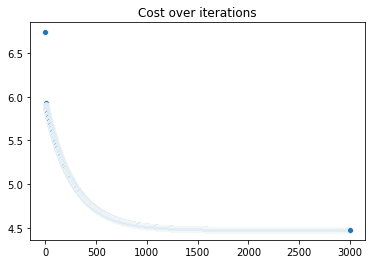

In [23]:
sns.scatterplot(data=costs).set(title='Cost over iterations');

### Check the regression fit

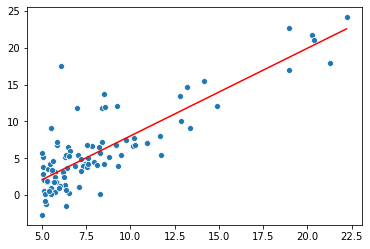

In [24]:
sns.scatterplot(x=data[:,0], y=data[:,1])
sns.lineplot(x=X[:,1], y=X.dot(thetas), color='r');

# Conclusion

We saw how to perform a simple linear regression with an educational dataset and how to check that a manual implementation is effectively fitting the dataset

## What to see next

How to do it with multiple variables and with more data work using pandas in [multiple linear regression](./MultipleLinearRegression.ipynb) 